In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import sqlite3
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
basics_ratings = pd.read_csv('../Data/movie_basics_rating.csv')
tmdb = pd.read_csv('../Data/tmdb_df.csv')
budget = pd.read_csv('../Data/movie_budget.csv')
info = pd.read_csv('../Data/movie_info.csv')
gross = pd.read_csv('../Data/bom_movie_gross.csv')

In [3]:
basics_ratings

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...,...
73851,73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [4]:
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
25492,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
25493,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
25494,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
25495,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [5]:
type(tmdb['genre_ids'])

pandas.core.series.Series

In [6]:
genre_map = {28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy',
             80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 
             14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 
             9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 
             10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}
#tmdb['genres'] = tmdb['genre_ids'].apply(lambda x: [genre_map[int(genre_id)] for genre_id in eval(x)])
tmdb['genre_labels'] = tmdb['genre_ids'].apply(lambda x: ', '.join([genre_map[int(genre_id)] for genre_id in eval(x)]))
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_labels
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"Adventure, Fantasy, Family"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"Fantasy, Adventure, Animation, Family"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"Adventure, Action, Science Fiction"
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"Animation, Comedy, Family"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"Action, Science Fiction, Adventure"
...,...,...,...,...,...,...,...,...,...,...,...
25492,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,"Horror, Drama"
25493,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,"Drama, Thriller"
25494,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,"Fantasy, Action, Adventure"
25495,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,"Family, Adventure, Action"


In [7]:
budget

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit
0,0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...,...,...
5777,5777,78,2018-12-31,Red 11,7000,0,0,-7000
5778,5778,79,1999-04-02,Following,6000,48482,240495,234495
5779,5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-3662
5780,5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400


In [8]:
info

,Unnamed: 0,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,studio
0,0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,NaN
1,1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Entertainment One
2,2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes,NaN
3,3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes,NaN
4,4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1555,1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",106 minutes,New Line Cinema
1556,1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",88 minutes,Paramount Vantage
1557,1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",111 minutes,NaN
1558,1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",101 minutes,NaN


In [9]:
gross

,Unnamed: 0,title,studio,domestic_gross,foreign_gross,year
0,0,Toy Story 3,BV,415000000,652000000,2010
1,1,Alice in Wonderland (2010),BV,334200000,691300000,2010
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010
3,3,Inception,WB,292600000,535700000,2010
4,4,Shrek Forever After,P/DW,238700000,513900000,2010
...,...,...,...,...,...,...
3382,3382,The Quake,Magn.,6200,0,2018
3383,3383,Edward II (2018 re-release),FM,4800,0,2018
3384,3384,El Pacto,Sony,2500,0,2018
3385,3385,The Swan,Synergetic,2400,0,2018


- merge basics_ratings & tmdb on original_title = basics_ratings_tmdb
- merge budget & gross on movie & title, respectively = budget_gross
- basics_ratings_tmdb & budget_gross on...
- info = irrelevant?

In [10]:
#merging basics_ratings & tmdb
basics_ratings_tmdb = pd.merge(basics_ratings, tmdb, on='original_title', how='inner')
basics_ratings_tmdb

,Unnamed: 0_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Unnamed: 0_y,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,genre_labels
0,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,24185,"[35, 18]",299782,en,9.800,2018-11-02,The Other Side of the Wind,7.0,64,"Comedy, Drama"
1,5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32,5872,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26,"Horror, Science Fiction, Adventure"
2,46328,tt4503112,Bigfoot,Bigfoot,2018,NaN,"Action,Horror",4.6,9,5872,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26,"Horror, Science Fiction, Adventure"
3,72791,tt9181914,Bigfoot,Bigfoot,2018,86.0,"Animation,Family",2.5,55,5872,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26,"Horror, Science Fiction, Adventure"
4,16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,8456,"[16, 28, 35, 10751]",116977,en,4.705,2013-05-07,Foodfight!,2.1,46,"Animation, Action, Comedy, Family"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16923,73431,tt9598566,Ave Maria,Ave Maria,2018,74.0,Drama,7.3,30,16520,[53],444182,en,0.600,2015-08-19,Ave Maria,10.0,1,Thriller
16924,73433,tt9600932,The Brink,The Brink,2019,91.0,Documentary,6.2,107,16711,"[14, 18]",361995,en,0.600,2015-08-07,The Brink,8.0,1,"Fantasy, Drama"
16925,73521,tt9647790,Celia,Celia,2018,100.0,Documentary,8.2,8,6338,[18],334204,en,1.400,2012-10-26,Celia,5.7,3,Drama
16926,73560,tt9668594,Belonging,Aidiyet,2019,73.0,"Crime,Drama,Romance",6.3,38,20434,[18],383260,tr,0.600,2016-03-30,Belonging,5.0,1,Drama


In [11]:
basics_ratings_tmdb.drop(['Unnamed: 0_x'], axis=1)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Unnamed: 0_y,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,genre_labels
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,24185,"[35, 18]",299782,en,9.800,2018-11-02,The Other Side of the Wind,7.0,64,"Comedy, Drama"
1,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32,5872,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26,"Horror, Science Fiction, Adventure"
2,tt4503112,Bigfoot,Bigfoot,2018,NaN,"Action,Horror",4.6,9,5872,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26,"Horror, Science Fiction, Adventure"
3,tt9181914,Bigfoot,Bigfoot,2018,86.0,"Animation,Family",2.5,55,5872,"[27, 878, 12]",117856,en,2.813,2012-06-30,Bigfoot,2.9,26,"Horror, Science Fiction, Adventure"
4,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,8456,"[16, 28, 35, 10751]",116977,en,4.705,2013-05-07,Foodfight!,2.1,46,"Animation, Action, Comedy, Family"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16923,tt9598566,Ave Maria,Ave Maria,2018,74.0,Drama,7.3,30,16520,[53],444182,en,0.600,2015-08-19,Ave Maria,10.0,1,Thriller
16924,tt9600932,The Brink,The Brink,2019,91.0,Documentary,6.2,107,16711,"[14, 18]",361995,en,0.600,2015-08-07,The Brink,8.0,1,"Fantasy, Drama"
16925,tt9647790,Celia,Celia,2018,100.0,Documentary,8.2,8,6338,[18],334204,en,1.400,2012-10-26,Celia,5.7,3,Drama
16926,tt9668594,Belonging,Aidiyet,2019,73.0,"Crime,Drama,Romance",6.3,38,20434,[18],383260,tr,0.600,2016-03-30,Belonging,5.0,1,Drama


In [12]:
budget_gross = pd.merge(budget,
                       gross,
                       left_on='movie',
                       right_on='title',
                       how='inner')
budget_gross

,Unnamed: 0_x,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,net_profit,Unnamed: 0_y,title,studio,domestic_gross_y,foreign_gross,year
0,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,330,Pirates of the Caribbean: On Stranger Tides,BV,241100000,804600000,2011
1,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,1875,Avengers: Age of Ultron,BV,459000000,946400000,2015
2,6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,3079,Avengers: Infinity War,BV,678800000,136900000,2018
3,8,9,2017-11-17,Justice League,300000000,229024295,655945209,355945209,2771,Justice League,WB,229000000,428900000,2017
4,9,10,2015-11-06,Spectre,300000000,200074175,879620923,579620923,1877,Spectre,Sony,200100000,680600000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,5667,68,2012-04-27,Sound of My Voice,135000,408015,429448,294448,1019,Sound of My Voice,FoxS,408000,0,2012
1243,5672,73,2012-06-15,Your Sister's Sister,120000,1597486,3090593,2970593,971,Your Sister's Sister,IFC,1600000,0,2012
1244,5679,80,2015-07-10,The Gallows,100000,22764410,41656474,41556474,1986,The Gallows,WB (NL),22800000,20200000,2015
1245,5685,86,2017-07-07,A Ghost Story,100000,1594798,2769782,2669782,2967,A Ghost Story,A24,1600000,0,2017


In [13]:
df = pd.merge(basics_ratings_tmdb, 
                  budget_gross,
                  left_on='primary_title',
                  right_on='movie',
                  how='inner')
df

,Unnamed: 0_x_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Unnamed: 0_y_x,...,production_budget,domestic_gross_x,worldwide_gross,net_profit,Unnamed: 0_y_y,title_y,studio,domestic_gross_y,foreign_gross,year
0,41,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,5350,...,25000000,720828,9313302,-15686698,904,On the Road,IFC,744000,8000000,2012
1,45101,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,5350,...,25000000,720828,9313302,-15686698,904,On the Road,IFC,744000,8000000,2012
2,55547,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,5350,...,25000000,720828,9313302,-15686698,904,On the Road,IFC,744000,8000000,2012
3,47,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,7998,...,91000000,58236838,187861183,96861183,1169,The Secret Life of Walter Mitty,Fox,58200000,129900000,2013
4,51,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,11053,...,28000000,26017685,62108587,34108587,1577,A Walk Among the Tombstones,Uni.,26300000,26900000,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,66324,tt7334528,Uncle Drew,Uncle Drew,2018,103.0,"Comedy,Sport",5.7,9739,24120,...,18000000,42469946,46527161,28527161,3175,Uncle Drew,LG/S,42500000,4200000,2018
1491,66395,tt7349662,BlacKkKlansman,BlacKkKlansman,2018,135.0,"Biography,Crime,Drama",7.5,149005,23864,...,15000000,49275340,93017335,78017335,3144,BlacKkKlansman,Focus,49300000,44000000,2018
1492,66584,tt7388562,"Paul, Apostle of Christ","Paul, Apostle of Christ",2018,108.0,"Adventure,Biography,Drama",6.7,5662,24076,...,5000000,17547999,25529498,20529498,3199,"Paul, Apostle of Christ",Affirm,17600000,5500000,2018
1493,66659,tt7401588,Instant Family,Instant Family,2018,118.0,"Comedy,Drama",7.4,46728,23881,...,48000000,67363237,119736188,71736188,3131,Instant Family,Par.,67400000,53200000,2018


In [14]:
df.isna().sum()

Unnamed: 0_x_x        0
movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes      33
genres                6
averagerating         0
numvotes              0
Unnamed: 0_y_x        0
genre_ids             0
id_x                  0
original_language     0
popularity            0
release_date_x        0
title_x               0
vote_average          0
vote_count            0
genre_labels          0
Unnamed: 0_x_y        0
id_y                  0
release_date_y        0
movie                 0
production_budget     0
domestic_gross_x      0
worldwide_gross       0
net_profit            0
Unnamed: 0_y_y        0
title_y               0
studio                0
domestic_gross_y      0
foreign_gross         0
year                  0
dtype: int64

In [15]:
df_profit_months=df.loc(axis=1)['primary_title', 'release_date_y', 'genres', 'net_profit']
df_profit_months

,primary_title,release_date_y,genres,net_profit
0,On the Road,2013-03-22,"Adventure,Drama,Romance",-15686698
1,On the Road,2013-03-22,Drama,-15686698
2,On the Road,2013-03-22,Drama,-15686698
3,The Secret Life of Walter Mitty,2013-12-25,"Adventure,Comedy,Drama",96861183
4,A Walk Among the Tombstones,2014-09-19,"Action,Crime,Drama",34108587
...,...,...,...,...
1490,Uncle Drew,2018-06-29,"Comedy,Sport",28527161
1491,BlacKkKlansman,2018-08-10,"Biography,Crime,Drama",78017335
1492,"Paul, Apostle of Christ",2018-03-23,"Adventure,Biography,Drama",20529498
1493,Instant Family,2018-11-16,"Comedy,Drama",71736188


In [16]:
df_profit_months['release_month']=pd.to_datetime(df_profit_months['release_date_y']).dt.strftime('%B')
df_profit_months

,primary_title,release_date_y,genres,net_profit,release_month
0,On the Road,2013-03-22,"Adventure,Drama,Romance",-15686698,March
1,On the Road,2013-03-22,Drama,-15686698,March
2,On the Road,2013-03-22,Drama,-15686698,March
3,The Secret Life of Walter Mitty,2013-12-25,"Adventure,Comedy,Drama",96861183,December
4,A Walk Among the Tombstones,2014-09-19,"Action,Crime,Drama",34108587,September
...,...,...,...,...,...
1490,Uncle Drew,2018-06-29,"Comedy,Sport",28527161,June
1491,BlacKkKlansman,2018-08-10,"Biography,Crime,Drama",78017335,August
1492,"Paul, Apostle of Christ",2018-03-23,"Adventure,Biography,Drama",20529498,March
1493,Instant Family,2018-11-16,"Comedy,Drama",71736188,November


In [17]:
df_profit_months=df_profit_months.drop('release_date_y', axis=1)
df_profit_months

,primary_title,genres,net_profit,release_month
0,On the Road,"Adventure,Drama,Romance",-15686698,March
1,On the Road,Drama,-15686698,March
2,On the Road,Drama,-15686698,March
3,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",96861183,December
4,A Walk Among the Tombstones,"Action,Crime,Drama",34108587,September
...,...,...,...,...
1490,Uncle Drew,"Comedy,Sport",28527161,June
1491,BlacKkKlansman,"Biography,Crime,Drama",78017335,August
1492,"Paul, Apostle of Christ","Adventure,Biography,Drama",20529498,March
1493,Instant Family,"Comedy,Drama",71736188,November


In [18]:
df_profit_months=df_profit_months.drop_duplicates('primary_title')
df_profit_months

,primary_title,genres,net_profit,release_month
0,On the Road,"Adventure,Drama,Romance",-15686698,March
3,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",96861183,December
4,A Walk Among the Tombstones,"Action,Crime,Drama",34108587,September
5,Jurassic World,"Action,Adventure,Sci-Fi",1433854864,June
6,The Rum Diary,"Comedy,Drama",-23455268,October
...,...,...,...,...
1490,Uncle Drew,"Comedy,Sport",28527161,June
1491,BlacKkKlansman,"Biography,Crime,Drama",78017335,August
1492,"Paul, Apostle of Christ","Adventure,Biography,Drama",20529498,March
1493,Instant Family,"Comedy,Drama",71736188,November


In [19]:
df_profit_months.loc[df_profit_months.duplicated()]

,primary_title,genres,net_profit,release_month


In [20]:
df_profit_months=df_profit_months.assign(genres=df_profit_months.genres.str.split(",")).explode('genres')
df_profit_months

,primary_title,genres,net_profit,release_month
0,On the Road,Adventure,-15686698,March
0,On the Road,Drama,-15686698,March
0,On the Road,Romance,-15686698,March
3,The Secret Life of Walter Mitty,Adventure,96861183,December
3,The Secret Life of Walter Mitty,Comedy,96861183,December
...,...,...,...,...
1493,Instant Family,Comedy,71736188,November
1493,Instant Family,Drama,71736188,November
1494,Hereditary,Drama,60133905,June
1494,Hereditary,Horror,60133905,June


In [21]:
df_profit_months=df_profit_months.loc[df_profit_months.genres=='Action']

In [22]:
#df_profit_months.to_csv('..Data/profit_months_action.csv')

In [23]:
df_profit_months.sort_values('net_profit', ascending=False).head(20)

,primary_title,genres,net_profit,release_month
1367,Avengers: Infinity War,Action,1748134200,April
5,Jurassic World,Action,1433854864,June
844,Black Panther,Action,1148258224,February
1420,Jurassic World: Fallen Kingdom,Action,1135772799,June
1119,Avengers: Age of Ultron,Action,1072413963,May
1314,Incredibles 2,Action,1042520711,June
503,Aquaman,Action,986894640,December
1394,The Fate of the Furious,Action,984846267,April
411,Transformers: Dark of the Moon,Action,928790543,June
182,Skyfall,Action,910526981,November


In [24]:
df_profit_months.release_month.value_counts()

June         35
July         35
August       33
January      32
March        29
February     28
September    27
May          27
November     26
October      23
December     21
April        20
Name: release_month, dtype: int64

In [25]:
mean_profit_per_month=df_profit_months.groupby('release_month')['net_profit'].mean()
mean_profit_per_month

release_month
April        2.266478e+08
August       1.026015e+08
December     2.047246e+08
February     1.308869e+08
January      5.655213e+07
July         2.268254e+08
June         3.005889e+08
March        1.465947e+08
May          3.168584e+08
November     2.527312e+08
October      8.994666e+07
September    7.574665e+07
Name: net_profit, dtype: float64

In [26]:
df_profit_months.groupby('release_month')['net_profit'].median()

release_month
April         40382459.0
August        37844516.0
December     109804632.0
February      46620092.0
January       40109640.5
July         160650494.0
June         192541256.0
March         90808837.0
May          277381584.0
November     103641678.0
October       50818912.0
September     42586606.0
Name: net_profit, dtype: float64

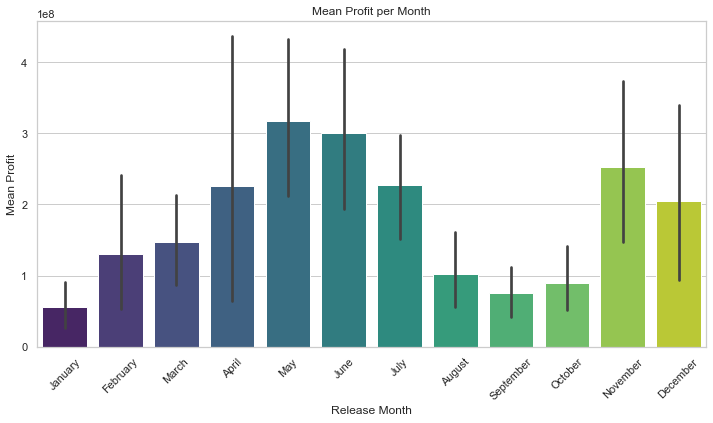

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']
sns.barplot(x=df_profit_months.release_month, y=df_profit_months.net_profit, order=month_order, palette='viridis')
plt.title('Mean Profit per Month')
plt.xlabel('Release Month')
plt.xticks(rotation=45)
plt.ylabel('Mean Profit')
plt.show()


In [28]:
df_profit_genres=df.loc(axis=1)['primary_title', 'genres', 'net_profit']
df_profit_genres
# relevant columns to analyse genres & profits

,primary_title,genres,net_profit
0,On the Road,"Adventure,Drama,Romance",-15686698
1,On the Road,Drama,-15686698
2,On the Road,Drama,-15686698
3,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",96861183
4,A Walk Among the Tombstones,"Action,Crime,Drama",34108587
...,...,...,...
1490,Uncle Drew,"Comedy,Sport",28527161
1491,BlacKkKlansman,"Biography,Crime,Drama",78017335
1492,"Paul, Apostle of Christ","Adventure,Biography,Drama",20529498
1493,Instant Family,"Comedy,Drama",71736188


In [29]:
df_profit_genres.loc[df_profit_genres.duplicated()]

,primary_title,genres,net_profit
2,On the Road,Drama,-15686698
22,Wonder Woman,"Action,Adventure,Fantasy",671133378
24,Wonder Woman,Sci-Fi,671133378
26,Wonder Woman,"Documentary,Drama,Sport",671133378
39,Unstoppable,"Action,Thriller",70720921
...,...,...,...
1426,The Square,"Comedy,Drama",-1323738
1428,Mandy,"Drama,Thriller",-4572344
1430,Mandy,"Action,Fantasy,Horror",-4572344
1436,Get Out,"Horror,Mystery,Thriller",250367951


In [30]:
df_profit_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1495 entries, 0 to 1494
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   primary_title  1495 non-null   object
 1   genres         1489 non-null   object
 2   net_profit     1495 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 46.7+ KB


In [31]:
df_profit_genres.isna().sum()

primary_title    0
genres           6
net_profit       0
dtype: int64

In [32]:
df_profit_genres.duplicated()

0       False
1       False
2        True
3       False
4       False
        ...  
1490    False
1491    False
1492    False
1493    False
1494    False
Length: 1495, dtype: bool

In [33]:
df_profit_genres.drop_duplicates()

,primary_title,genres,net_profit
0,On the Road,"Adventure,Drama,Romance",-15686698
1,On the Road,Drama,-15686698
3,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",96861183
4,A Walk Among the Tombstones,"Action,Crime,Drama",34108587
5,Jurassic World,"Action,Adventure,Sci-Fi",1433854864
...,...,...,...
1490,Uncle Drew,"Comedy,Sport",28527161
1491,BlacKkKlansman,"Biography,Crime,Drama",78017335
1492,"Paul, Apostle of Christ","Adventure,Biography,Drama",20529498
1493,Instant Family,"Comedy,Drama",71736188


In [34]:
df_profit_genres.sort_values('net_profit', ascending=False).head(20)

,primary_title,genres,net_profit
1367,Avengers: Infinity War,"Action,Adventure,Sci-Fi",1748134200
5,Jurassic World,"Action,Adventure,Sci-Fi",1433854864
845,Black Panther,"Action,Adventure,Sci-Fi",1148258224
844,Black Panther,"Action,Adventure,Sci-Fi",1148258224
1420,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",1135772799
359,Frozen,"Adventure,Drama,Sport",1122469910
362,Frozen,"Adventure,Animation,Comedy",1122469910
361,Frozen,"Adventure,Animation,Comedy",1122469910
360,Frozen,"Adventure,Drama,Sport",1122469910
1078,Minions,"Adventure,Animation,Comedy",1086336173


In [35]:
df_profit_genres.loc[df_profit_genres.duplicated()]

,primary_title,genres,net_profit
2,On the Road,Drama,-15686698
22,Wonder Woman,"Action,Adventure,Fantasy",671133378
24,Wonder Woman,Sci-Fi,671133378
26,Wonder Woman,"Documentary,Drama,Sport",671133378
39,Unstoppable,"Action,Thriller",70720921
...,...,...,...
1426,The Square,"Comedy,Drama",-1323738
1428,Mandy,"Drama,Thriller",-4572344
1430,Mandy,"Action,Fantasy,Horror",-4572344
1436,Get Out,"Horror,Mystery,Thriller",250367951


In [36]:
df_profit_genres=df_profit_genres.drop_duplicates('primary_title')
df_profit_genres

,primary_title,genres,net_profit
0,On the Road,"Adventure,Drama,Romance",-15686698
3,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",96861183
4,A Walk Among the Tombstones,"Action,Crime,Drama",34108587
5,Jurassic World,"Action,Adventure,Sci-Fi",1433854864
6,The Rum Diary,"Comedy,Drama",-23455268
...,...,...,...
1490,Uncle Drew,"Comedy,Sport",28527161
1491,BlacKkKlansman,"Biography,Crime,Drama",78017335
1492,"Paul, Apostle of Christ","Adventure,Biography,Drama",20529498
1493,Instant Family,"Comedy,Drama",71736188


In [37]:
df_profit_genres.sort_values('net_profit', ascending=False).head(20)

,primary_title,genres,net_profit
1367,Avengers: Infinity War,"Action,Adventure,Sci-Fi",1748134200
5,Jurassic World,"Action,Adventure,Sci-Fi",1433854864
844,Black Panther,"Action,Adventure,Sci-Fi",1148258224
1420,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",1135772799
359,Frozen,"Adventure,Drama,Sport",1122469910
1078,Minions,"Adventure,Animation,Comedy",1086336173
1119,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",1072413963
1314,Incredibles 2,"Action,Adventure,Animation",1042520711
503,Aquaman,"Action,Adventure,Fantasy",986894640
1394,The Fate of the Furious,"Action,Crime,Thriller",984846267


In [38]:
df_profit_genres.loc[df_profit_genres.duplicated()]

,primary_title,genres,net_profit


In [39]:
df_profit_genres.shape

(1133, 3)

In [40]:
type(df_profit_genres.genres)

pandas.core.series.Series

In [41]:
df_profit_genres.assign(genres=df_profit_genres.genres.str.split(",")).explode('genres')

,primary_title,genres,net_profit
0,On the Road,Adventure,-15686698
0,On the Road,Drama,-15686698
0,On the Road,Romance,-15686698
3,The Secret Life of Walter Mitty,Adventure,96861183
3,The Secret Life of Walter Mitty,Comedy,96861183
...,...,...,...
1493,Instant Family,Comedy,71736188
1493,Instant Family,Drama,71736188
1494,Hereditary,Drama,60133905
1494,Hereditary,Horror,60133905


In [42]:
df_profit_genres

,primary_title,genres,net_profit
0,On the Road,"Adventure,Drama,Romance",-15686698
3,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",96861183
4,A Walk Among the Tombstones,"Action,Crime,Drama",34108587
5,Jurassic World,"Action,Adventure,Sci-Fi",1433854864
6,The Rum Diary,"Comedy,Drama",-23455268
...,...,...,...
1490,Uncle Drew,"Comedy,Sport",28527161
1491,BlacKkKlansman,"Biography,Crime,Drama",78017335
1492,"Paul, Apostle of Christ","Adventure,Biography,Drama",20529498
1493,Instant Family,"Comedy,Drama",71736188
